In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

os.chdir("../../")

In [2]:
from src.benchmark_analysis import BenchmarkAnalysis

In [3]:

results_folder = "data/ragas_results"
# Load CSV files
df1 = pd.read_csv(f'{results_folder}/bm_baseline_benchmark_results.csv')
df2 = pd.read_csv(f'{results_folder}/bm_embedding_model_bge_large_results.csv')

               Metric  Baseline_Average  Prompt_eng_opt_Average  \
0  answer_correctness          0.689010                0.655881   
1        faithfulness          0.863333                0.878864   
2    answer_relevancy          0.846870                0.906868   
3   context_precision          0.980000                0.945903   

   Baseline_Highest  Prompt_eng_opt_Highest  Baseline_Lowest  \
0               1.0                0.998523         0.229628   
1               1.0                1.000000         0.200000   
2               1.0                1.000000         0.000000   
3               1.0                1.000000         0.833333   

   Prompt_eng_opt_Lowest  
0               0.229624  
1               0.333333  
2               0.000000  
3               0.679167  


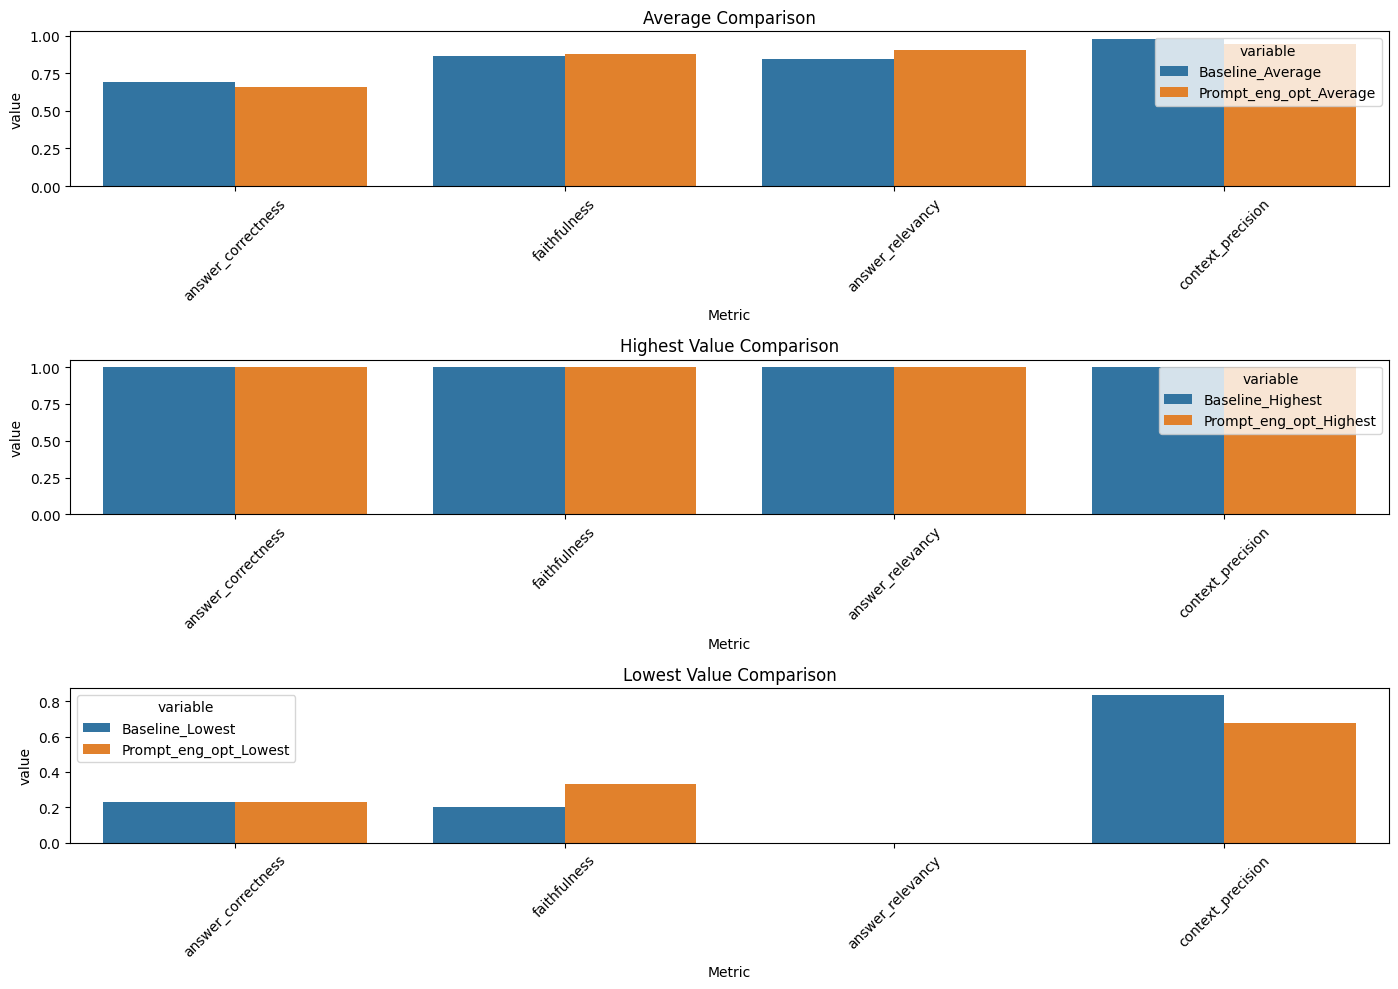

In [4]:
benchmark = BenchmarkAnalysis(df1, df2)
summary_df = benchmark.calculate_summary_statistics()
print(summary_df)
benchmark.visualize_summary_statistics(summary_df)


### Analyze deviations

In [6]:
deviations_df = benchmark.calculate_deviations()
# print(deviations_df)
benchmark.visualize_deviations(deviations_df)

alt.Chart(...)

##### Some Statistical Methods for Evaluation: t-test, p-p-value, Cohen's d 

In [8]:
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind # import independent ttest in case the samples are independent

# Load the data (replace 'baseline.csv' and 'new.csv' with the file paths)
df_baseline = df1.copy()
df_new = df2.copy()

# Perform paired t-test (if paired data) or independent ttest (if unpaired)
if "question_number" in df_baseline.columns:
    # Ensure dataframes are sorted by question_number for paired t-test
    df_baseline = df_baseline.sort_values("question_number")
    df_new = df_new.sort_values("question_number")

    t_statistic, p_value = ttest_rel(df_baseline['answer_correctness'], df_new['answer_correctness'])
else:
    # Use independent t-test if the samples are not paired
    t_statistic, p_value = ttest_ind(df_baseline['answer_correctness'], df_new['answer_correctness'])

# Calculate Cohen's d (example using the t-statistic and pooled standard deviation)
from math import sqrt
pooled_std = sqrt(((len(df_baseline) - 1) * df_baseline['answer_correctness'].std()**2 + 
                   (len(df_new) - 1) * df_new['answer_correctness'].std()**2) / 
                  (len(df_baseline) + len(df_new) - 2))
cohens_d = t_statistic / pooled_std


print(f"Paired t-test: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
print(f"Cohen's d: {cohens_d:.3f}")


Paired t-test: t-statistic=-0.600, p-value=0.552
Cohen's d: -3.390
